<a href="https://colab.research.google.com/github/mrcasutt/Mnist/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [45]:
#download Mnist Dataset included in Fastai
path = untar_data(URLs.MNIST); path

PosixPath('/root/.fastai/data/mnist_png')

In [46]:
#see what was downloaded (testing and training folders)
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/models'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [0]:
??ImageDataBunch.from_folder

In [0]:
training_path = path/'training'
testing_path = path/'testing'

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train=training_path, valid_pct=0.2, test=testing_path, ds_tfms=tfms, size=16)

In [0]:
??ImageDataBunch.from_folder()

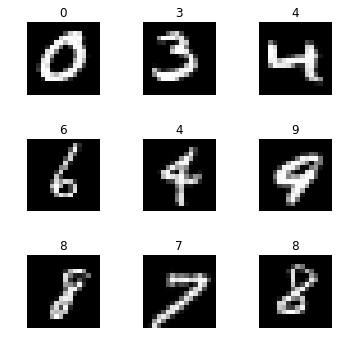

In [51]:
data.show_batch(rows=3, figsize=(5,5))

In [52]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.081050,0.810359,0.741143,02:03
1,0.596072,0.363166,0.888000,02:03
2,0.422280,0.264481,0.917571,02:00
3,0.405661,0.249385,0.923714,02:01


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.063881,0.029903,0.991429,02:02


In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


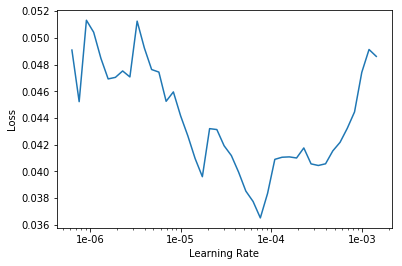

In [35]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.041015,0.028680,0.991857,02:07
1,0.044489,0.025333,0.992214,02:05
2,0.042826,0.023597,0.993000,02:02
3,0.033197,0.025330,0.992929,02:10


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f1e74f02160>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f1e74f02160>>
    w.join()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
AssertionError:

In [0]:
learn.save('stage-2')

In [0]:
data = ImageDataBunch.from_folder(path, train=training_path, valid_pct=0.2, test=testing_path, ds_tfms=tfms, size=28)
learn.data = data

In [61]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (56000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (14000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
4,0,9,4,7
Path: /root/.fastai/data/mnist_png;

Test: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: EmptyLabelList
,,,,
Path: /root/.fastai/data/mnist_png, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv

In [62]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.371100,0.249824,0.919286,02:02


KeyboardInterrupt: ignored